In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_excel('data/Data_Train.xlsx')
train[:5]

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


In [3]:
train.nunique()

ID                    147443
Date                    2507
LicenseNo              34384
FacilityID             25535
FacilityName           24348
Type                     409
Street                 17290
City                       2
State                      2
LocationID               104
Reason                    17
SectionViolations         61
RiskLevel                  4
Geo_Loc                16316
Inspection_Results         7
dtype: int64

In [4]:
test = pd.read_excel('data/Data_Test.xlsx')
test[:5]

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc
0,47571900570810,19-03-2014,34218,2354,2185,GROCERY STORE,17352,id-11235901,id_1890134,81864.0,CANVASS,19.0,Low,locid1145
1,19685766253655,22-11-2010,24597,13183,12516,SCHOOL,15536,id-11235901,id_1890134,81871.0,CANVASS,32.0,High,locid16450
2,37885701847801,09-06-2014,1779,26434,25220,RESTAURANT,8849,id-11235901,id_1890134,81902.0,CANVASS,NaN,High,locid12916
3,39946284936679,07-04-2010,8541,16246,16384,SCHOOL,11663,id-11235901,id_1890134,81869.0,CANVASS,NaN,High,locid7292
4,46793577796409,25-07-2010,35194,20114,19225,RESTAURANT,16286,id-11235901,id_1890134,81874.0,CANVASS RE-INSPECTION,32.0,High,locid2048


In [5]:
train.shape, test.shape

((147443, 15), (49148, 14))

In [6]:
train.Inspection_Results.value_counts()

4    79453
1    28456
5    20631
6    12691
3     4747
2     1420
0       45
Name: Inspection_Results, dtype: int64

In [7]:
train.Inspection_Results.value_counts(True)

4    0.538873
1    0.192997
5    0.139925
6    0.086074
3    0.032195
2    0.009631
0    0.000305
Name: Inspection_Results, dtype: float64

In [8]:
# train.plot(x='SectionViolations',y='Inspection_Results',kind='scatter',figsize=(18,8))

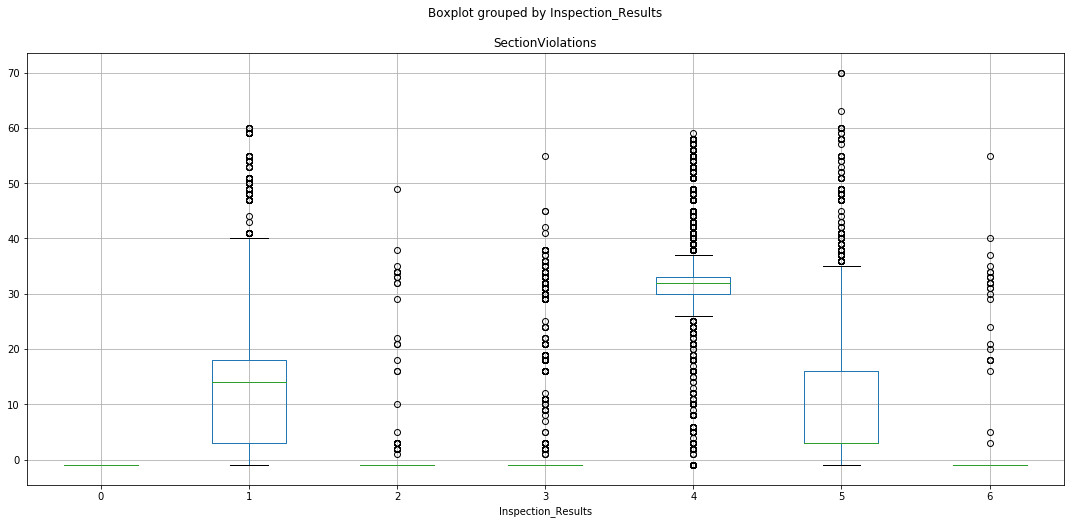

In [9]:
train.fillna(-1).boxplot(column='SectionViolations',by='Inspection_Results',figsize=(18,8))

In [10]:
data = pd.concat([train,test],sort=False).reset_index(drop=True)
data.shape

(196591, 15)

In [11]:
data.Date = pd.to_datetime(data.Date.apply(lambda x: x.replace('29-02','28-02')+' 12:00:00' if ('29-02' in x) else x+' 00:00:00'), format='%d-%m-%Y %H:%M:%S')
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['DayOfMonth'] = data.Date.dt.day
data['Weekday'] = data.Date.dt.dayofweek
data['DayOfYear'] = data.Date.dt.dayofyear
data.Date = data.Date.astype(int)/1e12
data = data.sort_values('Date').reset_index(drop=True)
data[:5]

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results,Year,Month,DayOfMonth,Weekday,DayOfYear
0,34750819963711,1231027.2,9030,16992,16219,RESTAURANT,13893,id-11235901,id_1890134,81879.0,LICENSE RE-INSPECTION,NaN,High,locid12327,4.0,2009,1,4,6,4
1,49233286112625,1231027.2,37048,24121,22999,RESTAURANT,14398,id-11235901,id_1890134,81856.0,CANVASS,18.0,High,locid9073,1.0,2009,1,4,6,4
2,11012510134565,1231027.2,11750,16348,15593,RESTAURANT,17379,id-11235901,id_1890134,81876.0,LICENSE,18.0,High,locid16811,1.0,2009,1,4,6,4
3,18328605468650,1231027.2,11244,26886,24377,RESTAURANT,3591,id-11235901,id_1890134,81858.0,LICENSE RE-INSPECTION,NaN,High,locid14197,NaN,2009,1,4,6,4
4,24257686822403,1231027.2,2728,7367,7014,RESTAURANT,72,id-11235901,id_1890134,81846.0,TAG REMOVAL,NaN,Medium,locid7590,4.0,2009,1,4,6,4


In [12]:
pd.concat([pd.isna(data).sum(),data.dtypes,data.nunique()],axis=1)

,0,1,2
ID,0,int64,196591
Date,0,float64,2522
LicenseNo,0,int64,37395
FacilityID,0,int64,27277
FacilityName,0,int64,26033
Type,4700,object,435
Street,0,int64,17892
City,0,object,2
State,0,object,2
LocationID,50,float64,112


In [13]:
data['cummean_sectionViolations_diff'] = data.groupby('FacilityID')['SectionViolations'].cumsum().fillna(0)/(data.groupby('FacilityID')['SectionViolations'].cumcount()+1) -\
                                         data[::-1].groupby('FacilityID')['SectionViolations'].cumsum().fillna(0)/(data[::-1].groupby('FacilityID')['SectionViolations'].cumcount()+1)
data['nxt_inspection'] = (data.Date - data.groupby('LicenseNo')['Date'].shift(-2)).fillna(-10)
data['cnt_date'] = data.Date.map(data.groupby('Date').size())

In [14]:
cols_to_drop = ['ID','LicenseNo','FacilityID','FacilityName','LocationID','City','State']
cat_cols = ['Reason','SectionViolations','RiskLevel']
data.SectionViolations = data.SectionViolations.fillna(-1)
data.LocationID = data.LocationID.fillna(-1)
data['isNull_SectionViolations'] = pd.isna(data.SectionViolations).astype(int)
data['isNull_LocationID'] = pd.isna(data.LocationID).astype(int)
data['isNull_Type'] = pd.isna(data.Type).astype(int)

In [15]:
data['n_date'] = data.groupby('Date')['ID'].transform('count')
data['n_license'] = data.groupby('LicenseNo')['ID'].transform('count')
data['cc_license'] = data.groupby('LicenseNo')['ID'].cumcount()
data['n_facility'] = data.groupby('FacilityID')['ID'].transform('count')
data['cc_facility'] = data.groupby('FacilityID')['ID'].cumcount()
data['n_street'] = data.groupby('Street')['ID'].transform('count')
data['n_city'] = data.groupby('City')['ID'].transform('count')
data['n_location'] = data.groupby('LocationID')['ID'].transform('count')
data['n_city_date'] = data.groupby(['City','Date'])['ID'].transform('count')
data['n_state'] = data.groupby('State')['ID'].transform('count')
data['Geo_Loc'] = data.groupby('Geo_Loc')['ID'].transform('count').fillna(1)
data['Street'] = data.groupby('Street')['ID'].transform('count').fillna(1)
data['Type'] = data.groupby('Type')['ID'].transform('count').fillna(1)

data['n_facilityNameInFacilityID'] = data.FacilityID.map(data.groupby('FacilityID')['FacilityName'].nunique())
data['n_licenseInLocationID'] = data.LocationID.map(data.groupby('LocationID')['LicenseNo'].nunique())
data['n_geolocInLocationID'] = data.LocationID.map(data.groupby('LocationID')['Geo_Loc'].nunique())

data['n_date_facilityID'] = data.groupby(['Date','FacilityID'])['ID'].transform('count')
data['n_date_license'] = data.groupby(['Date','LicenseNo'])['ID'].transform('count')
data['n_date_street'] = data.groupby(['Date','Street'])['ID'].transform('count')
data['n_date_geoloc'] = data.groupby(['Date','Geo_Loc'])['ID'].transform('count')

In [16]:
data['date_diff_license'] = (data.Date - data.groupby('LicenseNo')['Date'].shift(1)).fillna(-10)
data['date_diff_license2'] = (data.Date - data.groupby('LicenseNo')['Date'].shift(2)).fillna(-10)
data['date_diff_facility'] = (data.Date - data.groupby('FacilityID')['Date'].shift(1)).fillna(-10)
data['cc_date'] = data.Date.map(data.groupby('Date').size().cumsum())
data['cc_date_street'] = data.groupby(['Date','Street'])['ID'].transform('count')
data['cc_date_location'] = data.groupby(['Date','LocationID'])['ID'].transform('count')
data['cc_date_type'] = data.groupby(['Date','Type'])['ID'].transform('count')
data['cc_date_facility'] = data.groupby(['Date','FacilityID'])['ID'].transform('count')
data[:5]

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,...,n_date_street,n_date_geoloc,date_diff_license,date_diff_license2,date_diff_facility,cc_date,cc_date_street,cc_date_location,cc_date_type,cc_date_facility
0,34750819963711,1231027.2,9030,16992,16219,131182.0,16,id-11235901,id_1890134,81879.0,...,1,1,-10.0,-10.0,-10.0,7,1,1,7,1
1,49233286112625,1231027.2,37048,24121,22999,131182.0,20,id-11235901,id_1890134,81856.0,...,1,1,-10.0,-10.0,-10.0,7,1,1,7,1
2,11012510134565,1231027.2,11750,16348,15593,131182.0,2,id-11235901,id_1890134,81876.0,...,2,1,-10.0,-10.0,-10.0,7,2,1,7,1
3,18328605468650,1231027.2,11244,26886,24377,131182.0,27,id-11235901,id_1890134,81858.0,...,2,2,-10.0,-10.0,-10.0,7,2,2,7,2
4,24257686822403,1231027.2,2728,7367,7014,131182.0,312,id-11235901,id_1890134,81846.0,...,1,1,-10.0,-10.0,-10.0,7,1,1,7,1


In [17]:
for col in cat_cols:
    data[col] = data[col].astype('category')
data[:5]

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,...,n_date_street,n_date_geoloc,date_diff_license,date_diff_license2,date_diff_facility,cc_date,cc_date_street,cc_date_location,cc_date_type,cc_date_facility
0,34750819963711,1231027.2,9030,16992,16219,131182.0,16,id-11235901,id_1890134,81879.0,...,1,1,-10.0,-10.0,-10.0,7,1,1,7,1
1,49233286112625,1231027.2,37048,24121,22999,131182.0,20,id-11235901,id_1890134,81856.0,...,1,1,-10.0,-10.0,-10.0,7,1,1,7,1
2,11012510134565,1231027.2,11750,16348,15593,131182.0,2,id-11235901,id_1890134,81876.0,...,2,1,-10.0,-10.0,-10.0,7,2,1,7,1
3,18328605468650,1231027.2,11244,26886,24377,131182.0,27,id-11235901,id_1890134,81858.0,...,2,2,-10.0,-10.0,-10.0,7,2,2,7,2
4,24257686822403,1231027.2,2728,7367,7014,131182.0,312,id-11235901,id_1890134,81846.0,...,1,1,-10.0,-10.0,-10.0,7,1,1,7,1


In [18]:
data['prev_reason_license'] = data.groupby('LicenseNo')['Reason'].shift(1)
data['prev_reason_facility'] = data.groupby('FacilityID')['Reason'].shift(1)

data['prev_reason_license2'] = data.groupby('LicenseNo')['Reason'].shift(2)
data['prev_reason_facility2'] = data.groupby('FacilityID')['Reason'].shift(2)

data['nxt_reason_license'] = data.groupby('LicenseNo')['Reason'].shift(-1)
data['nxt_reason_facility'] = data.groupby('FacilityID')['Reason'].shift(-1)

data['nxt_reason_license2'] = data.groupby('LicenseNo')['Reason'].shift(-2)
data['nxt_reason_facility2'] = data.groupby('FacilityID')['Reason'].shift(-2)

In [19]:
data['prev_result_license'] = data.groupby('LicenseNo')['Inspection_Results'].shift(1).astype('category')
data['prev_result_license2'] = data.groupby('LicenseNo')['Inspection_Results'].shift(2).astype('category')

data['nxt_result_license'] = data.groupby('LicenseNo')['Inspection_Results'].shift(-1).astype('category')
data['nxt_result_license2'] = data.groupby('LicenseNo')['Inspection_Results'].shift(-2).astype('category')

In [20]:
train = data[pd.notna(data.Inspection_Results)].reset_index(drop=True)
test = data[pd.isna(data.Inspection_Results)].reset_index(drop=True)
train.shape, test.shape

((147443, 63), (49148, 63))

In [21]:
target = train.Inspection_Results
train = train.drop(columns=cols_to_drop+['Inspection_Results'])
test_ids = test[['ID']]
test = test[train.columns]
train.shape, test.shape, target.shape

((147443, 55), (49148, 55), (147443,))

In [22]:
samp = pd.read_excel('data/Sample_Submission.xlsx')
samp[:5]

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [23]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

/Users/yarafath/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [24]:
target = target.astype(int)
target.value_counts(True)

4    0.538873
1    0.192997
5    0.139925
6    0.086074
3    0.032195
2    0.009631
0    0.000305
Name: Inspection_Results, dtype: float64

In [25]:
kf1 = KFold(6, True, 1001)
kf2 = KFold(4, True, 42)

all_result = list()
for kf in [kf1,kf2]:
    print ('*'*100)
    for train_idx, val_idx in kf.split(train, target):
        print('#'*20, len(all_result), '#'*20)
        Xtrain = train.loc[train_idx,:]
        Xval = train.loc[val_idx,:]
        Ytrain = target.loc[train_idx]
        Yval = target.loc[val_idx]
        model = LGBMClassifier(n_estimators=6000, objective='multiclass',learning_rate=0.01)
        model.fit(Xtrain, Ytrain, eval_set = [(Xval,Yval),(Xtrain, Ytrain)], verbose=500, early_stopping_rounds=250)
        all_result.append(model.predict_proba(test))

****************************************************************************************************
#################### 0 ####################
Training until validation scores don't improve for 250 rounds
[500]	training's multi_logloss: 0.134568	valid_0's multi_logloss: 0.157084
[1000]	training's multi_logloss: 0.0992199	valid_0's multi_logloss: 0.143923
[1500]	training's multi_logloss: 0.0809752	valid_0's multi_logloss: 0.142925
Early stopping, best iteration is:
[1655]	training's multi_logloss: 0.0765955	valid_0's multi_logloss: 0.142901
#################### 1 ####################
Training until validation scores don't improve for 250 rounds
[500]	training's multi_logloss: 0.134755	valid_0's multi_logloss: 0.153377
[1000]	training's multi_logloss: 0.0997269	valid_0's multi_logloss: 0.138762
[1500]	training's multi_logloss: 0.0814688	valid_0's multi_logloss: 0.137098
[2000]	training's multi_logloss: 0.0685325	valid_0's multi_logloss: 0.136749
[2500]	training's multi_logloss: 0.05811

In [31]:
model = LGBMClassifier(n_estimators=2000, objective='multiclass',learning_rate=0.01)
model.fit(train, target)
all_result.append(model.predict_proba(test))

In [32]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)[train.columns]
train.shape, test.shape

In [34]:
len(all_result)

10

In [33]:
from catboost import CatBoostClassifier
kf = KFold(5, True, 330)
for train_idx, val_idx in kf.split(train, target):
    print('#'*20, len(all_result), '#'*20)
    Xtrain = train.loc[train_idx,:]
    Xval = train.loc[val_idx,:]
    Ytrain = target.loc[train_idx]
    Yval = target.loc[val_idx]
    model = CatBoostClassifier(objective='MultiClass', learning_rate=0.04, iterations=10000, early_stopping_rounds=250)
    model.fit(Xtrain, Ytrain, eval_set=(Xval,Yval), verbose=400)
    all_result.append(model.predict_proba(test))

In [27]:
result = pd.DataFrame(np.mean(all_result,axis=0), columns=samp.columns)
result['ID'] = test_ids.ID
result[:5]

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN,ID
0,8.033621e-09,0.003353,0.000004,0.000014,0.995926,0.000685,0.000018,18328605468650
1,4.972987e-08,0.005376,0.000006,0.000024,0.993546,0.000940,0.000107,12864736170514
2,1.472968e-08,0.001780,0.000001,0.000013,0.997467,0.000724,0.000015,19070455936767
3,1.985305e-06,0.183724,0.000029,0.000781,0.742533,0.071000,0.001930,39558576524615
4,2.296969e-08,0.969635,0.000003,0.000023,0.002285,0.028006,0.000049,15149149207234


In [28]:
test_idx = pd.read_excel('data/Data_Test.xlsx', usecols=['ID'])
test_idx['idx'] = test_idx.index.values
test_idx[:5]

,ID,idx
0,47571900570810,0
1,19685766253655,1
2,37885701847801,2
3,39946284936679,3
4,46793577796409,4


In [29]:
sol = pd.merge(result, test_idx, on='ID').drop(columns=['ID']).set_index('idx').sort_index()
sol[:5]

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
idx,,,,,,,
0,8.139328e-08,0.748230,8.433342e-05,0.048449,0.002757,0.200318,0.000162
1,1.104622e-08,0.000812,1.419760e-06,0.000018,0.997948,0.001198,0.000023
2,5.291214e-08,0.002663,1.537605e-03,0.890845,0.093888,0.002159,0.008907
3,1.539387e-07,0.039941,8.996900e-06,0.000060,0.025217,0.001593,0.933179
4,4.678241e-09,0.000387,8.526741e-07,0.000014,0.998425,0.001155,0.000018


In [30]:
sol.to_excel('solution_lgb10models.xlsx',index=False)

In [ ]:
# all_result_tm = np.array(all_result)**(1/len(all_result))
# result = pd.DataFrame(np.prod(all_result_tm,axis=0), columns=samp.columns)
# result = (result.T/result.sum(axis=1)).T
# result['ID'] = test_ids.ID
# test_idx = pd.read_excel('data/Data_Test.xlsx', usecols=['ID'])
# test_idx['idx'] = test_idx.index.values
# sol = pd.merge(result, test_idx, on='ID').drop(columns=['ID']).set_index('idx').sort_index()
# sol.to_excel('solution10.xlsx',index=False)
# sol[:5]